# 1. feladat
Adott egy Sudoku tábla és a számjegyek. A kép analízisével határozd meg az egyes számok hol helyezkednek el a sémában! Mely számjegyekkel lehet probléma, és hogyan küszöböljük ki a hibás döntést?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()

In [2]:
szamok=[]
for i in range(9):
    szines=plt.imread("sudoku/{}.bmp".format(i+1),"bmp")
    grey=szines[:, :, 0]*0.2126 + szines[:, :, 1]*0.7152 + szines[:, :, 2]*0.0722
    szamok.append(grey)
sudoku=plt.imread("sudoku/sudoku.jpg","jpg")
sudoku=sudoku[:, :, 0]*0.2126 + sudoku[:, :, 1]*0.7152 + sudoku[:, :, 2]*0.0722

In [15]:
helyek=[]
for h in range(len(szamok)):
    pontok=[]
    for i in range(len(sudoku)-len(szamok[h])): #y
        for j in range(len(sudoku[i])-len(szamok[h][0])): #x
            osszeg=0
            for k in range(4,len(szamok[h])-5):
                for l in range(len(szamok[h][0])):
                    if (abs(sudoku[i+k,j+l]-szamok[h][k,l])<20):
                        osszeg=osszeg+1
            if (osszeg>(len(szamok[h])-10)*len(szamok[h][0])-20):
                pontok.append([i+15,j+15,h+1])
    helyek.append(np.array(pontok))

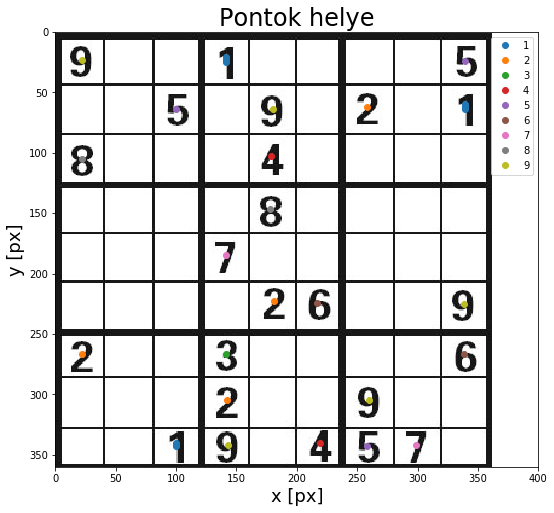

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(sudoku,"gray")
szam=['1','2','3','4','5','6','7','8','9']
for i in range(len(helyek)):
    plt.plot(helyek[i][:,1],helyek[i][:,0],"o",label='{}'.format(szam[i]))
plt.xlim(0,400)
plt.ylim(360,0)
plt.title("Pontok helye",fontsize=24)
plt.xlabel("x [px]",fontsize=18)
plt.ylabel("y [px]",fontsize=18)
plt.legend(loc='upper right')

In [24]:
sema=np.zeros((9,9))
for i in helyek:
    for j in i:
        sema[j[0]//40,j[1]//40]=j[2]
sema

array([[9., 0., 0., 1., 0., 0., 0., 0., 5.],
       [0., 0., 5., 0., 9., 0., 2., 0., 1.],
       [8., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 8., 0., 0., 0., 0.],
       [0., 0., 0., 7., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 6., 0., 0., 9.],
       [2., 0., 0., 3., 0., 0., 0., 0., 6.],
       [0., 0., 0., 2., 0., 0., 9., 0., 0.],
       [0., 0., 1., 9., 0., 4., 5., 7., 0.]])

# 2. feladat
Keresd meg az első feladatban megadott Sudoku tábla *egybefüggő objektumait* a `dbscan` klaszterezési módszer segítségével.

In [16]:
sudoku_xy=[]
for i in range(len(sudoku)):
    for j in range(len(sudoku[i])):
        if (sudoku[i,j]<50):
            sudoku_xy.append([i,j])
sudoku_xy=np.array(sudoku_xy)

In [17]:
m = DBSCAN(eps=1, min_samples=2)
m.fit(sudoku_xy)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [18]:
clusters = m.labels_

In [19]:
colors = ['black','red','orange','royalblue','brown','forestgreen','maroon', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

Text(0, 0.5, 'y [px]')

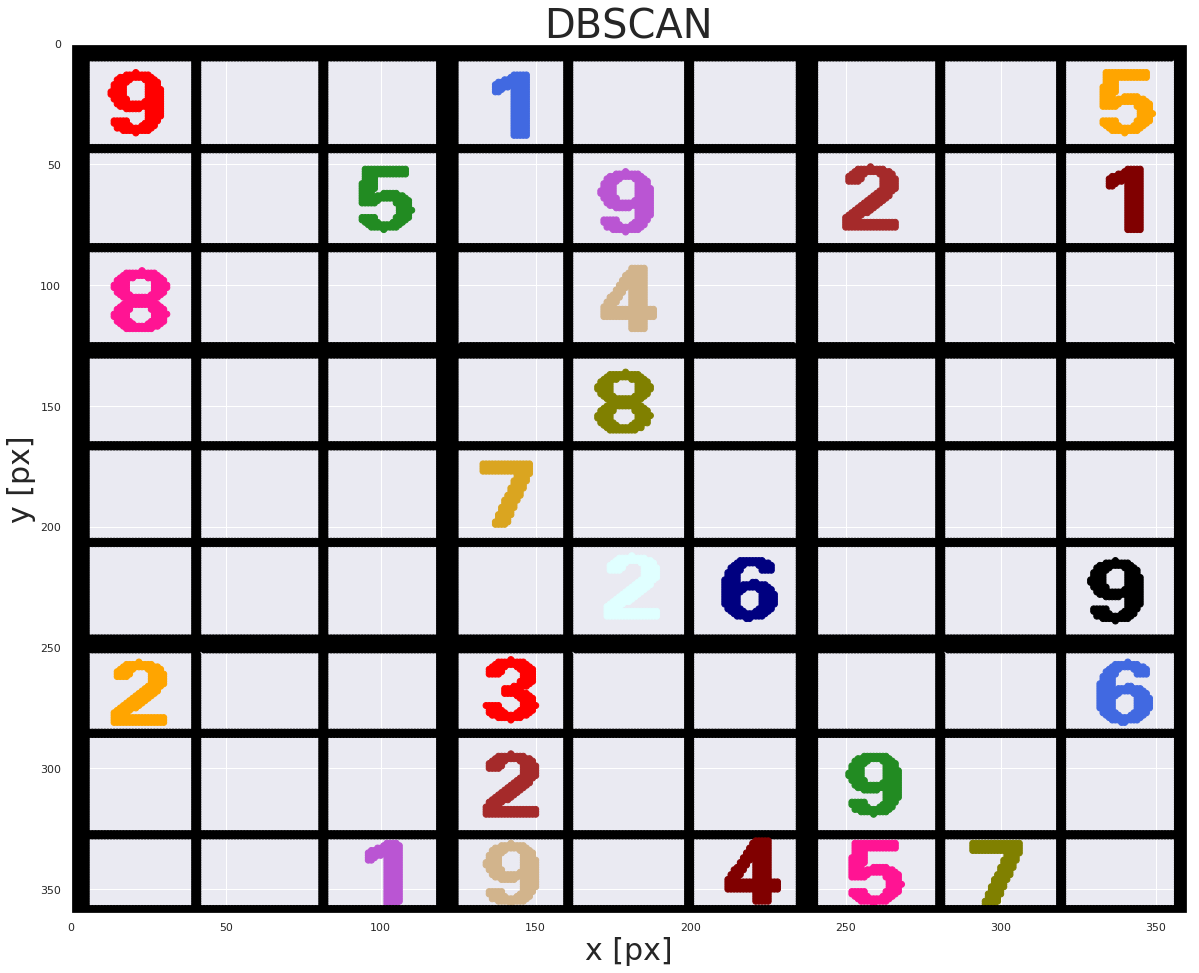

In [24]:
plt.figure(figsize=(20,16))
plt.scatter(sudoku_xy[:,1], sudoku_xy[:,0], c=vectorizer(clusters))
plt.xlim(0,360)
plt.ylim(360,0)
plt.title("DBSCAN",fontsize=40)
plt.xlabel("x [px]",fontsize=30)
plt.ylabel("y [px]",fontsize=30)